In [1]:
import os
os.chdir('D:datasets/')

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score

# MODEL
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [4]:
df=pd.read_csv('Breast_cancer_data.csv')
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [14]:
df.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

<Axes: xlabel='diagnosis'>

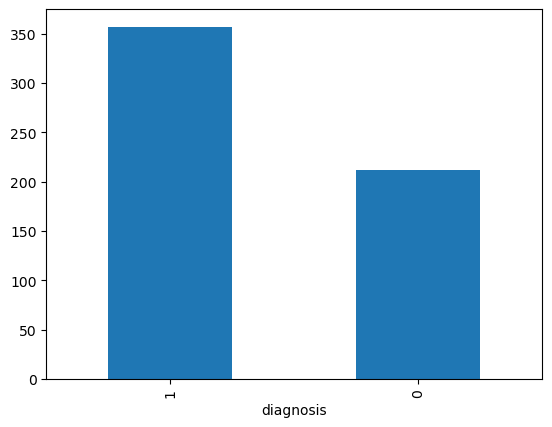

In [5]:
df['diagnosis'].value_counts().plot(kind='bar')

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='mean_smoothness', ylabel='Count'>

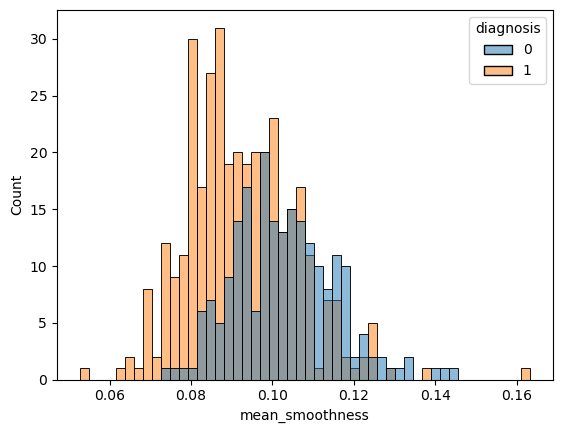

In [8]:
sns.histplot(x=df['mean_smoothness'],bins=50,hue=df['diagnosis'])

In [10]:
x=df.drop(['diagnosis'],axis=1)
y=df['diagnosis']

In [11]:
x

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


In [12]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [23]:
ss=StandardScaler()

In [24]:
x1=pd.DataFrame(ss.fit_transform(x),columns=ss.get_feature_names_out())
x1

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,1.097064,-2.073335,1.269934,0.984375,1.568466
1,1.829821,-0.353632,1.685955,1.908708,-0.826962
2,1.579888,0.456187,1.566503,1.558884,0.942210
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553
4,1.750297,-1.151816,1.776573,1.826229,0.280372
...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842
565,1.704854,2.085134,1.615931,1.723842,0.102458
566,0.702284,2.045574,0.672676,0.577953,-0.840484
567,1.838341,2.336457,1.982524,1.735218,1.525767


# Model

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=23)

In [26]:
# model
la=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
kn=KNeighborsClassifier()
sv=SVC()

In [29]:
model=[la,dt,rf,ad,kn,sv]

for i in model:
    i.fit(x_train,y_train)
    y_pred_train=i.predict(x_train)
    y_pred=i.predict(x_test)
    tr_f1=round(f1_score(y_pred_train,y_train),2)
    tr_cnf=confusion_matrix(y_pred_train,y_train)
    ts_f1=round(f1_score(y_pred,y_test),2)
    ts_cnf=confusion_matrix(y_pred,y_test)
    print('*'*60)
    print(i)
    print('Training f1_score:',tr_f1)
    print('-'*30)
    print("Confusion train",tr_cnf)
    print("Testing f1",ts_f1)
    print('-'*30)
    print("Confudion test",ts_cnf)




************************************************************
LogisticRegression()
Training f1_score: 0.94
------------------------------
Confusion train [[153  13]
 [ 20 269]]
Testing f1 0.97
------------------------------
Confudion test [[36  2]
 [ 3 73]]
************************************************************
DecisionTreeClassifier()
Training f1_score: 1.0
------------------------------
Confusion train [[173   0]
 [  0 282]]
Testing f1 0.92
------------------------------
Confudion test [[32  5]
 [ 7 70]]
************************************************************
RandomForestClassifier()
Training f1_score: 1.0
------------------------------
Confusion train [[173   0]
 [  0 282]]
Testing f1 0.96
------------------------------
Confudion test [[35  2]
 [ 4 73]]
************************************************************
AdaBoostClassifier()
Training f1_score: 0.99
------------------------------
Confusion train [[170   3]
 [  3 279]]
Testing f1 0.97
------------------------------


# According to above report RandomForest is best model

In [36]:
grid={
'criterion':['gini','entropy'],
'max_depth': [10, 20, 30],
'min_samples_leaf':[1,2,4]   
}

In [37]:
rs=RandomizedSearchCV(rf,param_distributions=grid,cv=3)

In [38]:
rs.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4]})

In [39]:
rs.best_params_

{'min_samples_leaf': 4, 'max_depth': 20, 'criterion': 'entropy'}

In [41]:
rf1=rs.best_estimator_
rf1

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=4)

# Training of randomforest model

In [42]:
y_pred_train1=rf1.predict(x_train)

acc=accuracy_score(y_pred_train1,y_train)
clss=classification_report(y_pred_train1,y_train)
cnf=confusion_matrix(y_pred_train1,y_train)

print('accuracy_score:',acc)
print('*'*30)
print('classification_report:',clss)
print('*'*30)
print('confusion_matrix:',cnf)

accuracy_score: 0.9604395604395605
******************************
classification_report:               precision    recall  f1-score   support

           0       0.92      0.97      0.95       165
           1       0.98      0.96      0.97       290

    accuracy                           0.96       455
   macro avg       0.95      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455

******************************
confusion_matrix: [[160   5]
 [ 13 277]]


# Testing of Random_forest model

In [43]:
y_pred1=rf1.predict(x_test)

acc1=accuracy_score(y_pred1,y_test)
clss1=classification_report(y_pred1,y_test)
cnf1=confusion_matrix(y_pred1,y_test)

print('accuracy_score:',acc1)
print('*'*30)
print('classification_report:',clss1)
print('*'*30)
print('confusion_matrix:',cnf1)

accuracy_score: 0.956140350877193
******************************
classification_report:               precision    recall  f1-score   support

           0       0.90      0.97      0.93        36
           1       0.99      0.95      0.97        78

    accuracy                           0.96       114
   macro avg       0.94      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

******************************
confusion_matrix: [[35  1]
 [ 4 74]]
